### Description: Computes PCE coeficients using projection approach (Gaussian Quadrature)
#### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com
#### Additional packages required: [UQTk](www.sandia.gov)

In [13]:
#!/usr/bin/python
from numpy import *
import matplotlib.pyplot as plt
import os
import math
import sys

Defines the function that needs to be represented by PCE expansion:

In [14]:
def f(x):
    return polyval([5,3,-2,-1,2],x)

PCE expansion set up:

In [15]:
d = 1 # dimension
p = 3 # order of pce 
PCtype = 'LU' # type of pce basis
outLog = '  '

Quadrature set-up (UQTk quadrature type options: 'LU', 'HG', 'CC', 'CCO', 'NC', 'NCO'):

In [16]:
Qtype  ='LU' # type of quadrature
Qstype = 'full'# sparse or tensor grid
Qlvl   = 9 # level of quadrature

Generate quadratrue points using UQtk (outputs into a file) and load them:

In [17]:
CMD = 'generate_quad -g '+Qtype+' -p '+str(Qlvl)+' -d '+str(d)+' -x '+Qstype+ ' -v 0'
os.system(CMD+outLog)
Xpts = loadtxt('qdpts.dat')
Xwts = loadtxt('wghts.dat')
#print X.shape, W.shape
Y = f(Xpts)
savetxt('ydata.dat',Y)

Computes PCE coefficients, read then from file, compute L2 norm, and print the results:

In [32]:
CMD = 'pce_resp -e -x '+PCtype+' -d'+str(d)+' -o'+str(p)
os.system(CMD+outLog);

In [33]:
Ypc =loadtxt('ydata_pc.dat')
PCcoeff = loadtxt('PCcoeff_quad.dat')
PCmindex = loadtxt('mindex.dat')
L2norm = linalg.norm(multiply(sqrt(Xwts),Y - Ypc),2)
PCtermsNZ = sum(1 for i in PCcoeff if abs(i) > 1e-04)

In [34]:
print('PCE type   : ',PCtype,'\nPCE Dim    : ',d,'\nPCE Order  : ',p,'\n# PCE terms: ',len(PCcoeff))
print('-------------------')
print('Quad type  : ',Qtype,'\nSparse grd?: ',Qstype,'\nQuad Level : ',Qlvl,'\n#  qpoints : ',Xpts.shape[0])
print('-------------------')
print('Non-zero PCE coeffs: (',PCtermsNZ,'/', len(PCcoeff),')')
for i,mi in enumerate(PCmindex):
    if abs(PCcoeff[i]) > 1e-05:
        print('{:5d}'.format(i),' : ', mi.astype(int),' : ', '{:8.3f}'.format(PCcoeff[i]))
print('-------------------')
print('L2 Error   : ', L2norm)

PCE type   :  LU 
PCE Dim    :  1 
PCE Order  :  3 
# PCE terms:  4
-------------------
Quad type  :  LU 
Sparse grd?:  full 
Quad Level :  9 
#  qpoints :  9
-------------------
Non-zero PCE coeffs: ( 4 / 4 )
    0  :  0  :     2.333
    1  :  1  :     0.800
    2  :  2  :     1.524
    3  :  3  :     1.200
-------------------
L2 Error   :  0.3809523809523844


Plot the true data vs PCE expansion for 1D cases:

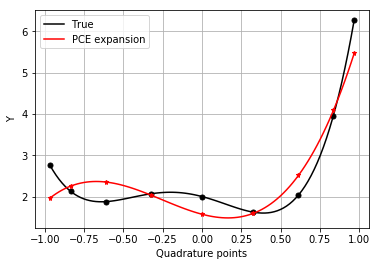

In [27]:
if d==1:
    Msize = 5
    fig = plt.figure(1)
    Xgrd = linspace(min(Xpts),max(Xpts),100)
    savetxt('xdata.dat',Xgrd)
    CMD = 'pce_eval -e -x PC -d'+str(d)+' -o'+str(p)+' -f PCcoeff_quad.dat -s'+str(PCtype)
    os.system(CMD+outLog);
    Ygrd = loadtxt('ydata.dat')
    plt.plot(Xpts,Y,'ko',markersize=Msize)
    plt.plot(Xgrd,f(Xgrd),'k-',label='True')
    plt.plot(Xpts,Ypc,'r*',markersize=Msize)
    plt.plot(Xgrd,Ygrd,'r-',label='PCE expansion')
    plt.grid(True)
    plt.legend(loc='best', numpoints = 1)
    plt.ylabel('Y')
    plt.xlabel('Quadrature points')
    plt.savefig('PCE1D_proj.pdf',bbox_inches='tight')